In [4]:
import cv2
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import glob

# Subject visualizer

shp:(4201, 2026) min:0 max:65535
shp:(577, 537) min:0 max:65535
shp:(4201, 2026) min:0 max:65535
shp:(5461, 2356) min:0 max:65535
shp:(489, 689) min:25019 max:65535
shp:(5461, 2356) min:0 max:65535


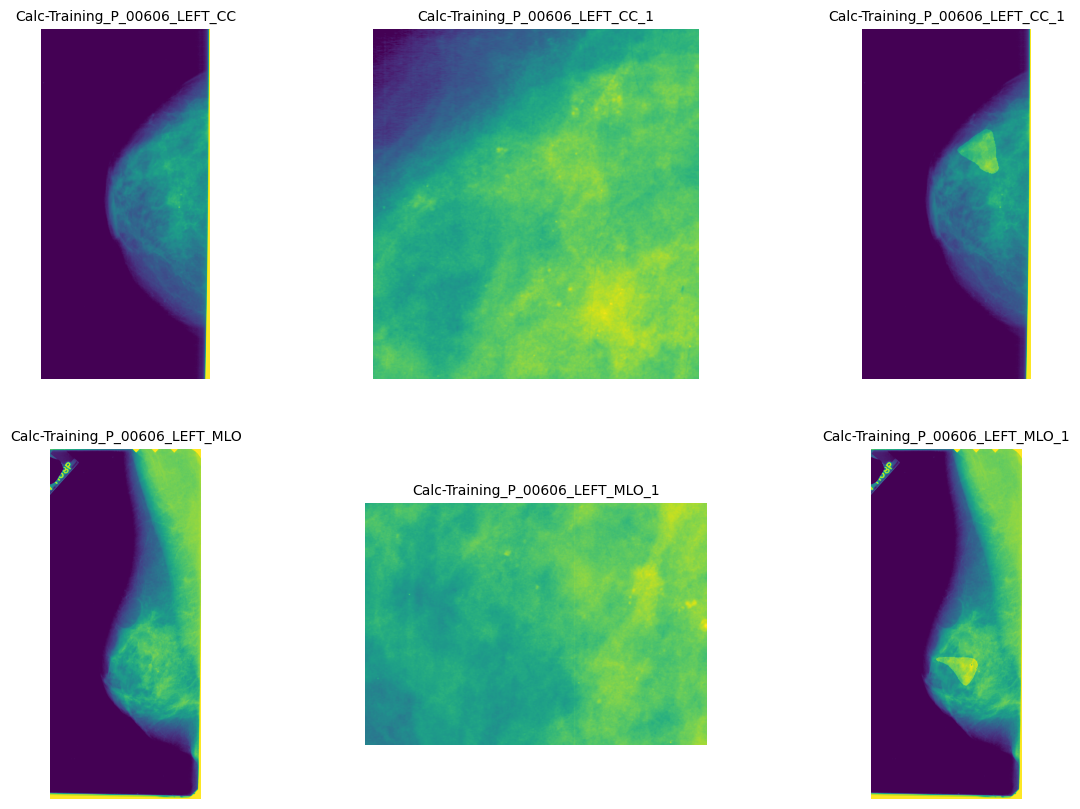

In [5]:
PATH = '/home/francesco/Documents/breast_cancer_detection/data/second_dset/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/'
def viz_subject(subj_id):
    files = sorted(glob.glob(f'{PATH}/*_{subj_id}_*/*/*/*.dcm'))
    imgs = [pydicom.dcmread(f).pixel_array for f in files]

    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
    for i, (f, ax) in enumerate(zip(files, axs.flatten())):

        if (i == 2):
            img = imgs[0] + (imgs[2]).astype(np.uint16)*50
        elif (i == 5):
            img = imgs[3] + (imgs[5]).astype(np.uint16)*50
        else:
            img = imgs[i]
        
        title = f.split('/')[-4]
        ax.imshow(img, vmin=0, vmax=65535)
        ax.set_axis_off()
        ax.set_title(f'{title}', fontsize=10)

        print(f'shp:{img.shape} min:{img.min()} max:{img.max()}')
        
              
viz_subject('00606')

# Video creation

In [65]:
import cv2
import numpy as np
import pydicom

src = pydicom.dcmread('titties/145056531.dcm').pixel_array

size = src.shape
out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (size[1], size[0]), False)

flag = True
th = 800
while flag:
    data1 = (src>th)#.astype(np.uint8)*255 #np.random.randint(0, 256, size, dtype='uint8')
    data2 = (src<th+200)#.astype(np.uint8)*255 #np.random.randint(0, 256, size, dtype='uint8')
    data = (data1*data2).astype(np.uint8)*255 #np.random.randint(0, 256, size, dtype='uint8')
    
    out.write(data)
    if th > 4100:
        flag = False
    th += 10
    
out.release()